In [64]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [27]:
from bs4 import BeautifulSoup
import requests

def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables

tables=fetch_html_tables('https://www.motor.no/aktuelt/motors-store-vintertest-av-rekkevidde-pa-elbiler/217132')
table_html=tables[0]

In [28]:
def html_to_table(html):
    "Returns the table defined in html as a list"
    #defining the table:
    table=[]
    #iterating over all rows
    for row in html.find_all('tr'):
        r=[]
        #finding all cells in each row:
        cells=row.find_all('td')
        
        #if no cells are found, look for headings
        if len(cells)==0:
            cells=row.find_all('th')
            
        #iterate over cells:
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        #append the row to t:
        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])
        
    #here you can add additional characters/strings you want to 
    #remove, change punctuations or format the string in other
    #ways:
    s=s.replace('\xa0','')
    s=s.replace('\n','')
    return s

table=html_to_table(table_html)

In [29]:
';'.join(table[0])

'                Modell (temp. varierte fra 0° til -10°)                ;                WLTP-tall                ;                STOPP                ;                Avvik                '

In [30]:
def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name,'w')
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()
    
save_data('test.csv',table)

In [31]:
motor = pd.read_csv('test.csv', delimiter=';', encoding='latin1')
motor.columns = ['modell', 'wltp', 'stopp' , 'avikk']

In [32]:
motor[['wltpkm', 'kwh']] = motor['wltp'].str.split('/', expand=True)
motor = motor.drop(index=motor[motor['stopp'] == 'x'].index) 
motor['wltpkm'] = motor['wltpkm'].str.replace(' km', '')
motor['stopp'] = motor['stopp'].str.replace(' km', '')

In [33]:
motor.rename(columns = {'stopp':'stoppkm'}, inplace = True)

In [36]:
motor.drop(columns=['wltp', 'avikk', 'kwh'])
motor = motor.astype({"stoppkm":"int","wltpkm":"int"})

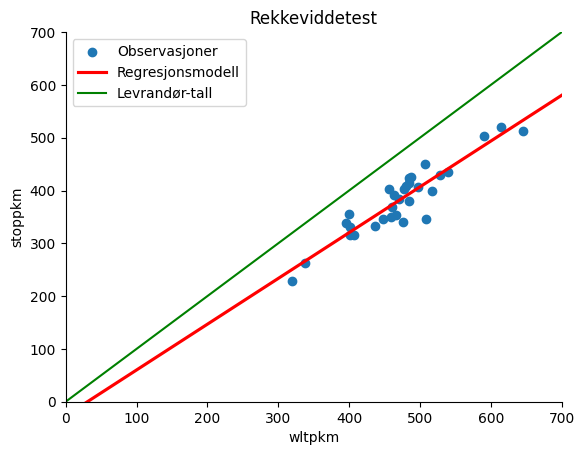

In [63]:
linje = np.linspace(0,700, num = 10)
fig, ax = plt.subplots()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_xlim(0,700)
ax.set_ylim(0,700)
ax.scatter(motor['wltpkm'], motor['stoppkm'], label = 'Observasjoner');
sns.regplot(x = "wltpkm", y = "stoppkm", data = motor, ci=None, truncate=False, scatter=False, color="red", label="Regresjonsmodell")
ax.plot(linje,linje,color="green", label="Levrandør-tall")
ax.set_title('Rekkeviddetest')
ax.legend(loc='best');